## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
sns.set()

Import Data

In [2]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
country_code = ['USA']
def country_code_mapping(arr):
    x = []
    for item in arr:
        x.append(country_code.__contains__(item))
    return pd.Series(x)

In [4]:
type(data['Medal'] == 'Gold')

pandas.core.series.Series

In [5]:
columns = data.columns.values
columns

array(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype=object)

In [6]:
data['Sport'].unique() #66 sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

Visualize male and Female data

In [7]:
data_male = data[data['Sex'] == 'M']
data_male_medals = data_male.dropna(subset=['Medal'])
data_female = data[data['Sex'] == 'F'
data_female_medals = data_female.dropna(subset=['Medal'])]
assert(data_male.size + data_female.size == data.size)

SyntaxError: invalid syntax (<ipython-input-7-5ccb7fc958da>, line 4)

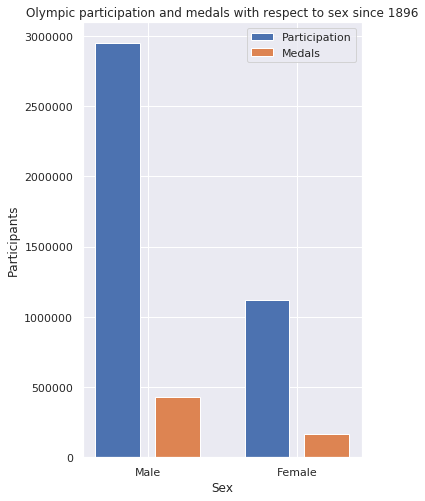

In [8]:
fig = plt.figure(figsize = (5, 8))
X = ['Male', 'Female']
X_axis = np.arange(2)
plt.bar(X_axis-0.2, [data_male.size, data_female.size], width=0.3, label='Participation')
plt.bar(X_axis+0.2, [data_male_medals.size, data_female_medals.size], width=0.3, label='Medals')
plt.xticks(X_axis, X)
plt.xlabel('Sex')
plt.ylabel('Participants')
plt.title("Olympic participation and medals with respect to sex since 1896")
plt.legend()
plt.show()

In [9]:
data['NOC'].unique(), data['NOC'].unique().size

(array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
        'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
        'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
        'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
        'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
        'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
        'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
        'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
        'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
        'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
        'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
        'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
        'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
        'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
      

In [10]:
data_country = data.loc[country_code_mapping(data['NOC'])]
data_country = data_country.reset_index(drop=True)
data_country

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
2,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
3,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
4,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18848,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
18849,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
18850,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
18851,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [11]:
country_gold = data_country[data_country['Medal'] == 'Gold']
country_gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
31,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
34,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold
35,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
36,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18729,133237,"Timothy R. ""Tim"" Young",M,26.0,172.0,77.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
18761,133685,Mariel Leigh Zagunis,F,19.0,173.0,72.0,United States,USA,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold
18762,133685,Mariel Leigh Zagunis,F,23.0,173.0,72.0,United States,USA,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold
18820,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold


In [12]:
country_gold_sports = country_gold['Sport'].unique()
country_gold_sports

array(['Golf', 'Basketball', 'Rowing', 'Baseball', 'Athletics',
       'Wrestling', 'Shooting', 'Boxing', 'Swimming', 'Tennis',
       'Football', 'Figure Skating', 'Sailing', 'Softball',
       'Equestrianism', 'Snowboarding', 'Weightlifting', 'Water Polo',
       'Alpine Skiing', 'Cycling', 'Synchronized Swimming', 'Ice Hockey',
       'Bobsleigh', 'Volleyball', 'Archery', 'Canoeing', 'Gymnastics',
       'Diving', 'Freestyle Skiing', 'Speed Skating', 'Art Competitions',
       'Beach Volleyball', 'Rugby', 'Nordic Combined', 'Tug-Of-War',
       'Skeleton', 'Jeu De Paume', 'Judo', 'Roque', 'Triathlon', 'Polo',
       'Taekwondo', 'Short Track Speed Skating', 'Fencing'], dtype=object)

In [13]:
data_country[data_country['Season'] == "Summer"].dropna(subset=['Medal'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
22,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
24,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
25,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
31,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18820,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold
18824,135103,"Albert Conrad ""Al"" Zirkel",M,19.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze
18828,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze
18834,135184,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,180.0,76.0,United States,USA,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze


In [14]:
data_country[data_country['Season'] == "Winter"].dropna(subset=['Medal'])['Sport'].value_counts()

Ice Hockey                   265
Bobsleigh                     74
Speed Skating                 70
Figure Skating                65
Alpine Skiing                 44
Short Track Speed Skating     42
Snowboarding                  24
Freestyle Skiing              21
Luge                           9
Skeleton                       8
Nordic Combined                7
Curling                        4
Ski Jumping                    1
Cross Country Skiing           1
Name: Sport, dtype: int64

In [15]:
data[data['Season'] == 'Winter']['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [16]:
data[data['Season'] == 'Summer']['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

Visualize participation vs sport for a country

In [17]:
country_sport_count = data_country['Sport'].value_counts()
country_sport_count

Athletics                    3211
Gymnastics                   2013
Swimming                     1638
Rowing                        828
Fencing                       690
Shooting                      645
Speed Skating                 570
Art Competitions              562
Alpine Skiing                 552
Cross Country Skiing          538
Cycling                       523
Ice Hockey                    498
Equestrianism                 456
Wrestling                     383
Basketball                    341
Water Polo                    317
Canoeing                      311
Football                      301
Sailing                       296
Figure Skating                293
Diving                        278
Bobsleigh                     266
Volleyball                    263
Boxing                        255
Biathlon                      246
Tennis                        200
Hockey                        182
Archery                       175
Ski Jumping                   175
Weightlifting 

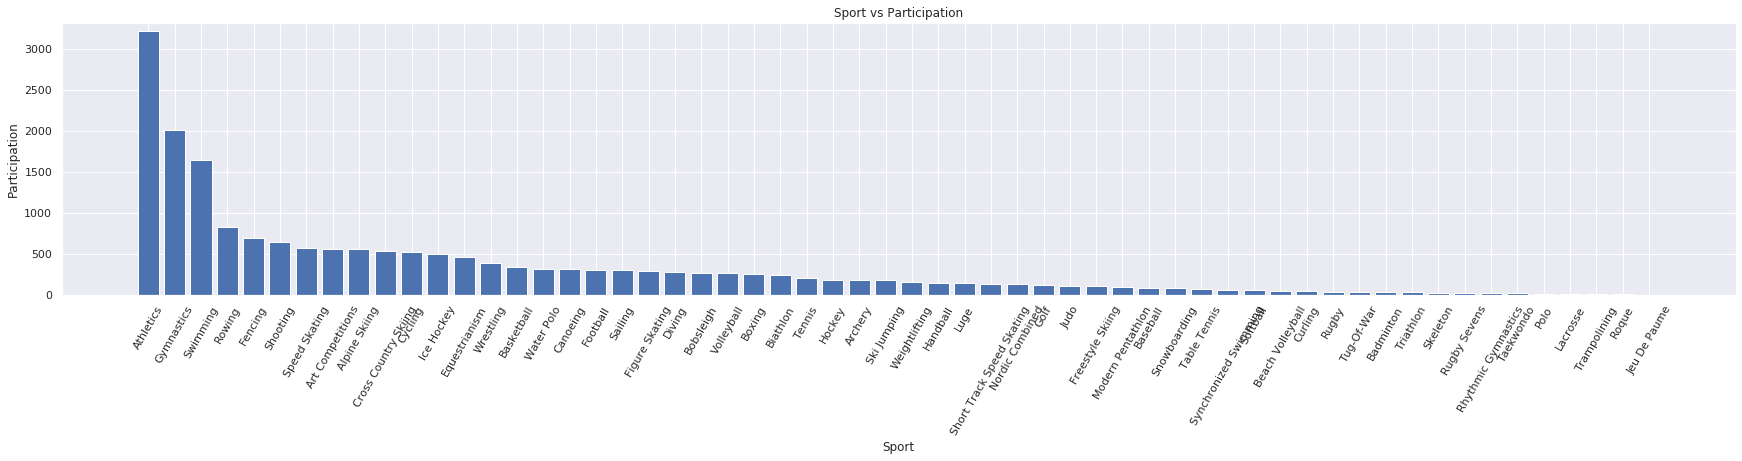

In [18]:
fig = plt.figure(figsize = (30, 5))

plt.xticks(rotation=60)
plt.ylim([0, max(country_sport_count) + 100])
plt.bar(country_sport_count.index, country_sport_count.values)
plt.xlabel('Sport')
plt.ylabel('Participation')
plt.title('Sport vs Participation')
plt.show()

Analysis of medals of a country

In [19]:
# pd.set_option('display.max_rows', None)
medals_country = data_country.dropna(subset=['Medal'])
medals_country

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
20,145,Jeremy Abbott,M,28.0,175.0,70.0,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
22,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
24,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
25,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18820,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold
18824,135103,"Albert Conrad ""Al"" Zirkel",M,19.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze
18828,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze
18834,135184,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,180.0,76.0,United States,USA,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze


In [20]:
medals_country_count = medals_country['Medal'].value_counts()
medals_country_count

Gold      2638
Silver    1641
Bronze    1358
Name: Medal, dtype: int64

Visualize Paarticipation vs Sport

In [21]:
temp_data = medals_country.drop_duplicates(subset=['Sport','Event','Games'], keep='first',inplace=False)
medals_country_sport = temp_data['Sport'].value_counts()
medals_country_sport

Athletics                    521
Swimming                     404
Wrestling                    115
Boxing                       100
Shooting                      94
Rowing                        81
Gymnastics                    76
Diving                        73
Sailing                       59
Speed Skating                 56
Equestrianism                 50
Figure Skating                41
Cycling                       39
Alpine Skiing                 38
Weightlifting                 34
Tennis                        30
Basketball                    28
Fencing                       23
Archery                       22
Freestyle Skiing              18
Bobsleigh                     17
Short Track Speed Skating     17
Snowboarding                  17
Canoeing                      16
Ice Hockey                    16
Judo                          14
Water Polo                    12
Volleyball                    10
Synchronized Swimming          9
Taekwondo                      9
Modern Pen

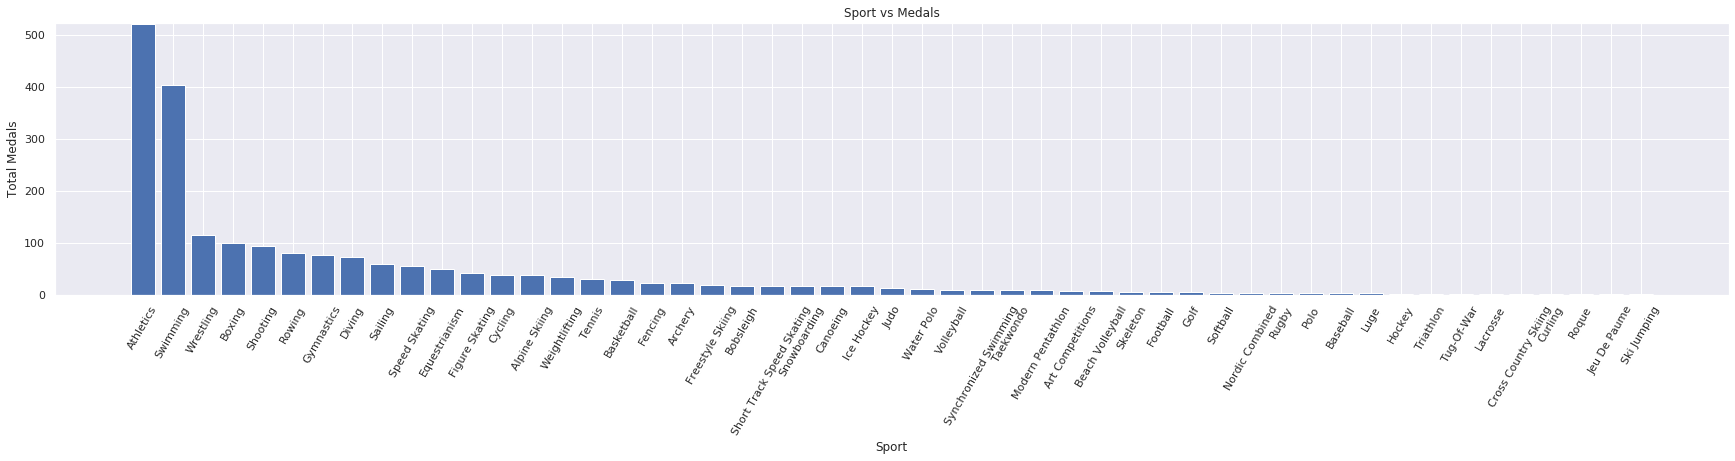

In [32]:
fig = plt.figure(figsize = (30, 5))

plt.xticks(rotation=60)
plt.ylim([0, max(medals_country_sport) + 2])
plt.bar(medals_country_sport.index, medals_country_sport.values)
plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.title('Sport vs Medals')
plt.show()

Visualize Medals vs Year

In [23]:
temp_data = medals_country[medals_country['Season'] != 'Winter'].drop_duplicates(subset=['Sport','Event','Games'], keep='first',inplace=False)
medals_count = temp_data['Year'].value_counts()
# medals_count
for i in range(1896, max(data['Year']) + 1, 4):
    if not medals_count.__contains__(i) and not [1916, 1940, 1944].__contains__(i):
        medals_count[i] = 0

# medals_count.sort_index()
# medals_count[2020] = 7
medals_count = medals_count.sort_index()
medals_count

1896     12
1900     30
1904     90
1906     17
1908     32
1912     40
1920     65
1924     67
1928     39
1932     78
1936     41
1948     58
1952     56
1956     53
1960     56
1964     66
1968     73
1972     71
1976     71
1980      0
1984    138
1988     81
1992     97
1996     89
2000     80
2004     87
2008     92
2012     91
2016    107
Name: Year, dtype: int64

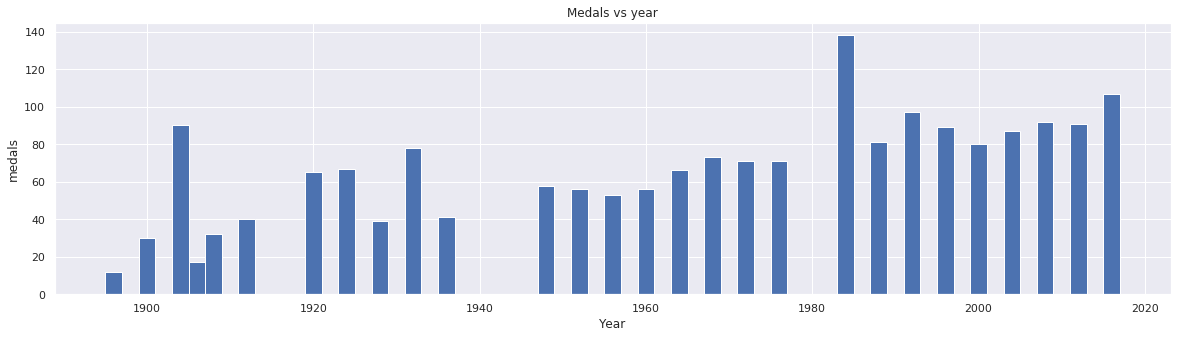

In [24]:
fig = plt.figure(figsize=(20,5))
plt.bar(medals_count.index, medals_count.values, width=2)
plt.xlabel('Year')
plt.ylabel('medals')
plt.title('Medals vs year')
plt.show()

Machine Learning for Forecasting using Linear model

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression
x = [[item] for item in medals_count.index]
y = [[item] for item in medals_count.values]
reg = LinearRegression().fit(x, y)
(reg.coef_, reg.intercept_)

(array([[0.50638684]]), array([-926.08282284]))

In [26]:
reg.predict([[2020]])

array([[96.81858638]])

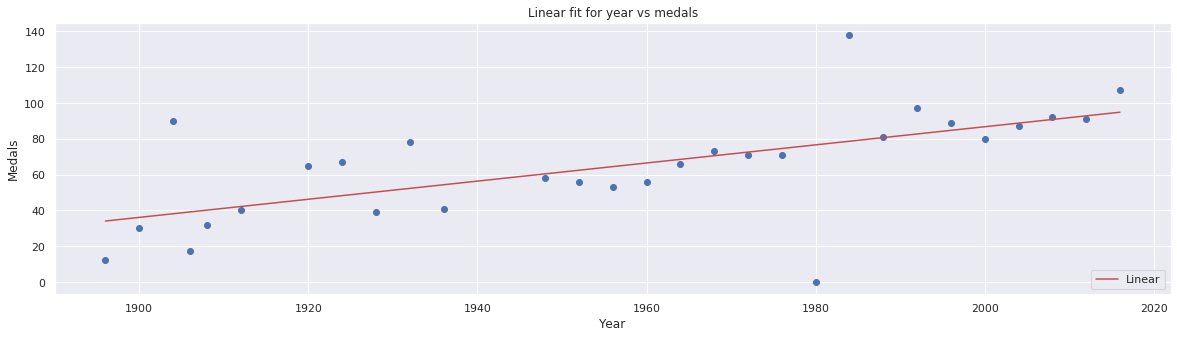

In [27]:
fig = plt.figure(figsize=(20,5))
yhat0 = [ reg.predict([[item]])[0][0] for item in medals_count.index]
plt.scatter(medals_count.index, medals_count.values)
plt.plot(x, yhat0, '-r', label='Linear')
plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Linear fit for year vs medals')
plt.legend(loc='lower right')
plt.show()

In [28]:
reg.predict([[2024]])

array([[98.84413373]])

Machine Learning for Forecasting using non linear model

In [29]:
import sklearn
import math
from sklearn.svm import SVR
x = [[item] for item in medals_count.index]
y = [ item for item in medals_count.values]
svr_poly = SVR(kernel='linear', C=2, gamma='auto', degree=2, epsilon=.01)
model = svr_poly.fit(x, y)

In [30]:
model.predict([[2020]])

array([98.99])

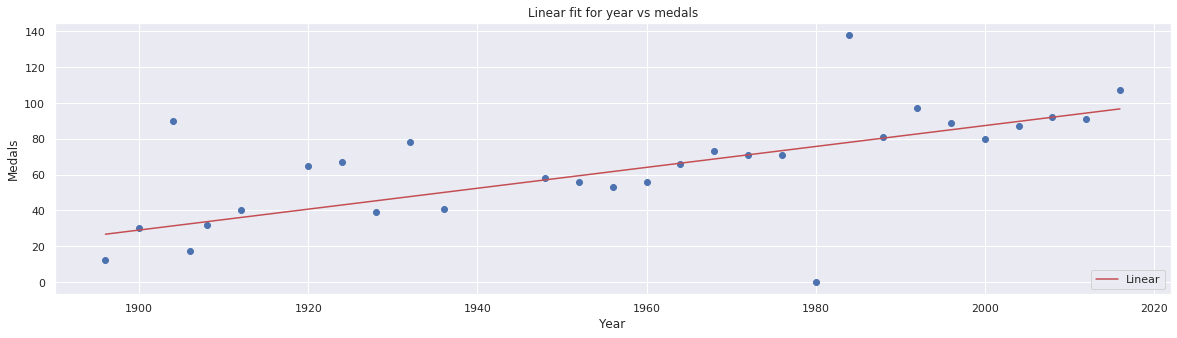

In [31]:
fig = plt.figure(figsize=(20,5))
yhat = [ model.predict([[item]]) for item in medals_count.index]
plt.scatter(medals_count.index, y)
plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Linear fit for year vs medals')
plt.plot(x, yhat, '-r', label='Linear')
plt.legend(loc='lower right')
